# Quick performance profile

After re-implementing the cellular automata using Numpy's vectorized operations, the execution time is cut in about half, showing about a second per loop for the generic implementation versus about half a second for the numpy implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ca import carule
from canp import CellularAutomaton
from canpp import CellularAutomaton as CellularAutomaton2

In [2]:
%matplotlib inline

In [3]:
SIZE=2048

1 loop, best of 3: 20 s per loop


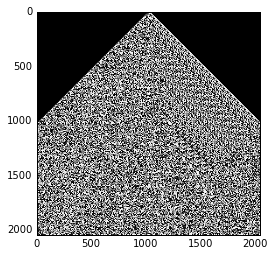

In [5]:
def apply(rule, img):
    height = img.shape[0]
    for y in range(height-1):
        row = img[y]
        img[y+1,:] = np.array(rule(row), dtype=img.dtype)
    return img

rule = carule(30,2,1)

img = np.zeros((SIZE,SIZE), dtype=np.int)
img[0,SIZE//2] = 1

%timeit apply(rule, img)

plt.imshow(img, cmap='gray')

Interestingly, the test exposes a bug in the old code, which produced results that are flipped left-to-right compared to the conventional order shown for the automaton.

1 loop, best of 3: 9.23 s per loop


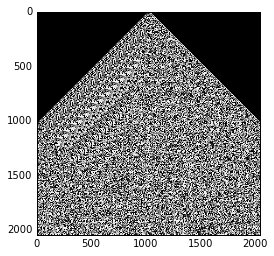

In [6]:
ca = CellularAutomaton(30,2,1)

img = np.zeros((SIZE,SIZE), dtype=np.int)
img[0,SIZE//2] = 1

%timeit ca.apply(img)

plt.imshow(img, cmap='gray')

1 loop, best of 3: 31.1 s per loop


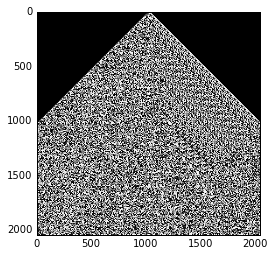

In [7]:
ca = CellularAutomaton2(30,2,1)

img = np.zeros((SIZE,SIZE), dtype=np.int)
img[0,SIZE//2] = 1

%timeit ca.apply(img)

plt.imshow(img, cmap='gray')

In [ ]:
import cProfile

ca = CellularAutomaton(30,2,1)

img = np.zeros((512,512), dtype=np.int)
img[0,255] = 1

cProfile.run('ca.apply(img)')